<a href="https://colab.research.google.com/github/pranavmswamy/stocks-covid-19-analysis/blob/main/Infrrd_Assignment_2_Pranav_M_Swamy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Stock Prices**
In this case study, I present a pictorial analysis of the stock market performance of five companies in the context of the COVID-19 pandemic.
 - Google (GOOG)
 - Wayfair (W)
 - Zoom (ZM)
 - Live Nation Entertainment (LYV)
 - United Airlines (UAL)

In [75]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Tiingo**

Tiingo is a financial data platform that makes high quality financial tools available to everyone. Tiingo has a REST and Real-Time Data API, which can be accessed either directly through its API endpoints or through the tiingo python library.

Having used it for tiingo previously for an assignment that I did at USC, I will continue to use the same API. For this analysis, we need information of Stock Market Closing Prices. 

First, let's intall tiingo and configure the client object with my API key.



In [76]:
# installing tiingo
!pip install tiingo

from tiingo import TiingoClient

# configring the client object with my API key.
config = dict()
config['session'] = True
config['api_key'] = "c6945fbdf54d1d8f82a44716ac4de3338e027db5"

# Initialize
client = TiingoClient(config)

The tiingo client object has a method called `get_dataframe()` which accepts the following arguments:

- tickers: list (of tickers) or string (of one ticker)
- frequency: frequency of data ( daily, weekly, monthly, yearly)
- metric_name (optional) : provide metric name to return
- startDate: starting date to get prices from.
- endDate: ending date till when to get prices.

I will use this method to get daily end-of-day stock prices data of GOOG for the last one year. As we can see, the dataframe contains the following columns:
- close
- high
- low
- open
- volume
- adjClose
- adjHigh
- adjLow
- adjOpen
- adjVolume
- divCash
- splitFactor


In [77]:
# Collecting GOOG prices in a daataframe from 17th December 2019 to 17th 
# December 2020
goog_all = client.get_dataframe('GOOG',
                                      startDate='2019-12-17',
                                      endDate='2020-12-17')
goog_all.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2019-12-17 00:00:00+00:00,1355.12,1365.00,1351.32,1362.89,1855259,1355.12,1365.00,1351.32,1362.89,1855259,0.0,1.0
2019-12-18 00:00:00+00:00,1352.62,1360.47,1351.00,1356.60,1657069,1352.62,1360.47,1351.00,1356.60,1657069,0.0,1.0
2019-12-19 00:00:00+00:00,1356.04,1358.10,1348.98,1351.82,1470112,1356.04,1358.10,1348.98,1351.82,1470112,0.0,1.0
2019-12-20 00:00:00+00:00,1349.59,1363.64,1349.00,1363.35,3316905,1349.59,1363.64,1349.00,1363.35,3316905,0.0,1.0
2019-12-23 00:00:00+00:00,1348.84,1359.80,1346.51,1355.87,883200,1348.84,1359.80,1346.51,1355.87,883200,0.0,1.0


We can see that there are 5 different prices for each day, the given price and the respectivec 'adjusted' price. What is the difference between these two prices?

From https://finance.zacks.com/adjusted-closing-price-vs-closing-price-9991.html :

*Stocks have both a "closing price" and an "adjusted closing price." These prices reflect two different ways of determining the value of the stock. The closing price is simply the cash value of that specific piece of stock at day's end while the adjusted closing price reflects the closing price of the stock in relation to other stock attributes. In general, the adjusted closing price is considered to be a more technically accurate reflection of the true value of the stock.*

Hence, I will only consider adjusted closing prices and adjuste volume for the purpose of this analysis.

Next, I will draw a line plot of the adjusted closing prices for GOOG for the last year, and mark the 52-week high and 52-week low. Notice how the bar graph is clustered into 52-week periods as well! 

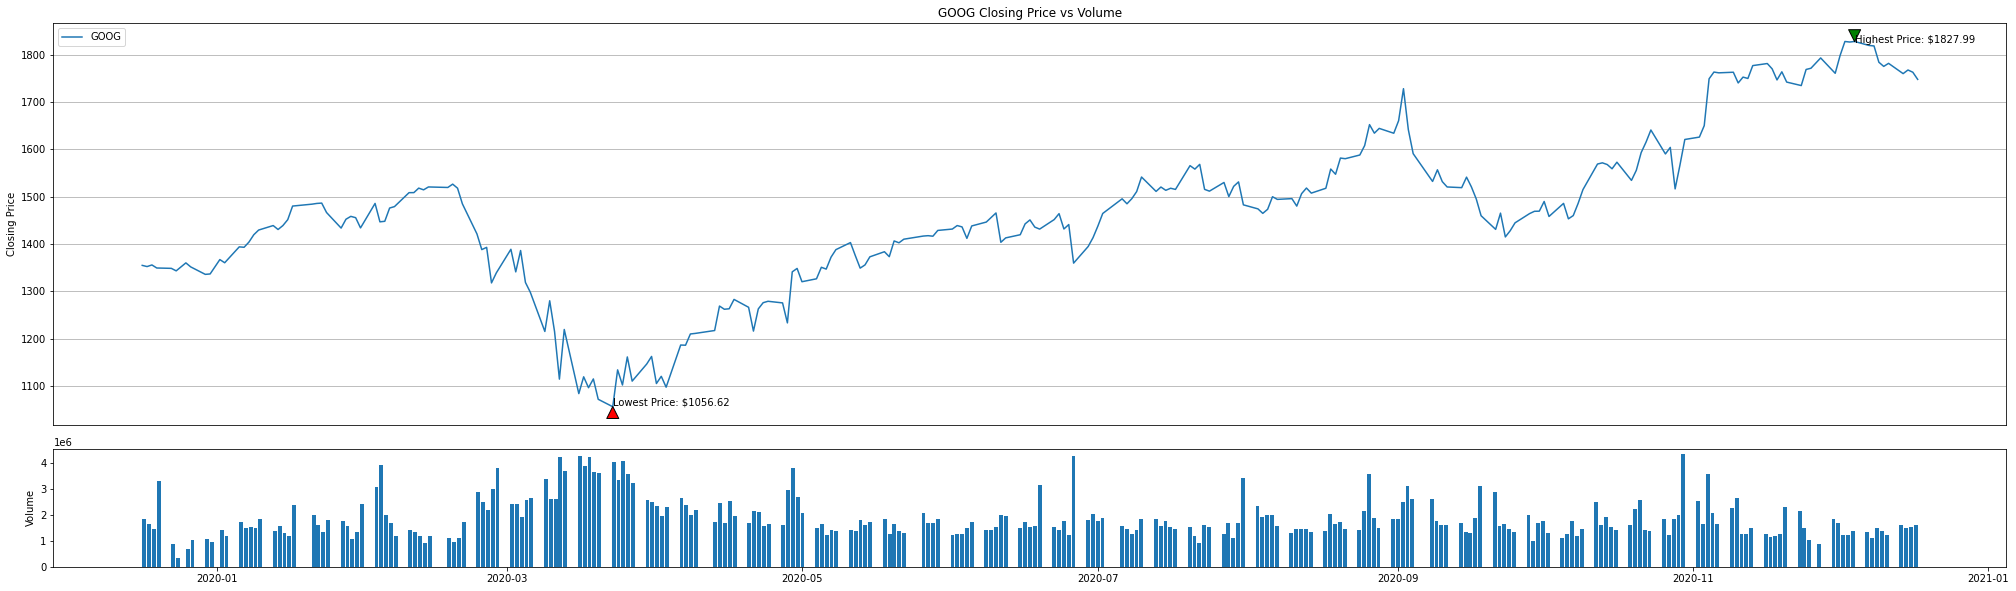

In [78]:
# filtering dataset to keep only adjClose and adjVolume columns.
columns_needed = ['adjClose', 'adjVolume']
goog_price_volume = goog_all[columns_needed]


# plotting the line plot of adjusted closing prices of GOOG and bar plot of
# adjusted volume of shares of GOOG 
plt.figure(figsize=(35,10))
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(goog_price_volume.index, goog_price_volume['adjClose'], label="GOOG")
bottom.bar(goog_price_volume.index, goog_price_volume['adjVolume'])

# adding titles and labels to chart
top.axes.get_xaxis().set_visible(False)
top.grid()
top.legend(loc="upper left");
top.set_title('GOOG Closing Price vs Volume')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

# finding 52-week high and 52-week low in the data to mark them on the chart.
max_adjClose = np.max(goog_price_volume['adjClose'])
max_adjClose_idx = goog_price_volume['adjClose'].idxmax()
min_adjClose = np.min(goog_price_volume['adjClose'])
min_adjClose_idx = goog_price_volume['adjClose'].idxmin()

# marking 52-week high on the chart
top.annotate(f'Highest Price: ${max_adjClose}', 
             xy=(max_adjClose_idx, max_adjClose - 0.5), 
             xytext=(max_adjClose_idx, max_adjClose - 3), 
             arrowprops=dict(facecolor='green'));

# marking 52-week low on the chart
top.annotate(f'Lowest Price: ${min_adjClose}', 
             xy=(min_adjClose_idx, min_adjClose + 0.5),
             xytext=(min_adjClose_idx, min_adjClose + 3),
             arrowprops=dict(facecolor='red'));


For our next visualization, let us see on how many days a particular stock price was the same. For this, I will plot a bar chart of the different stock prices of GOOG vs their frequency of occurence over the last year. 

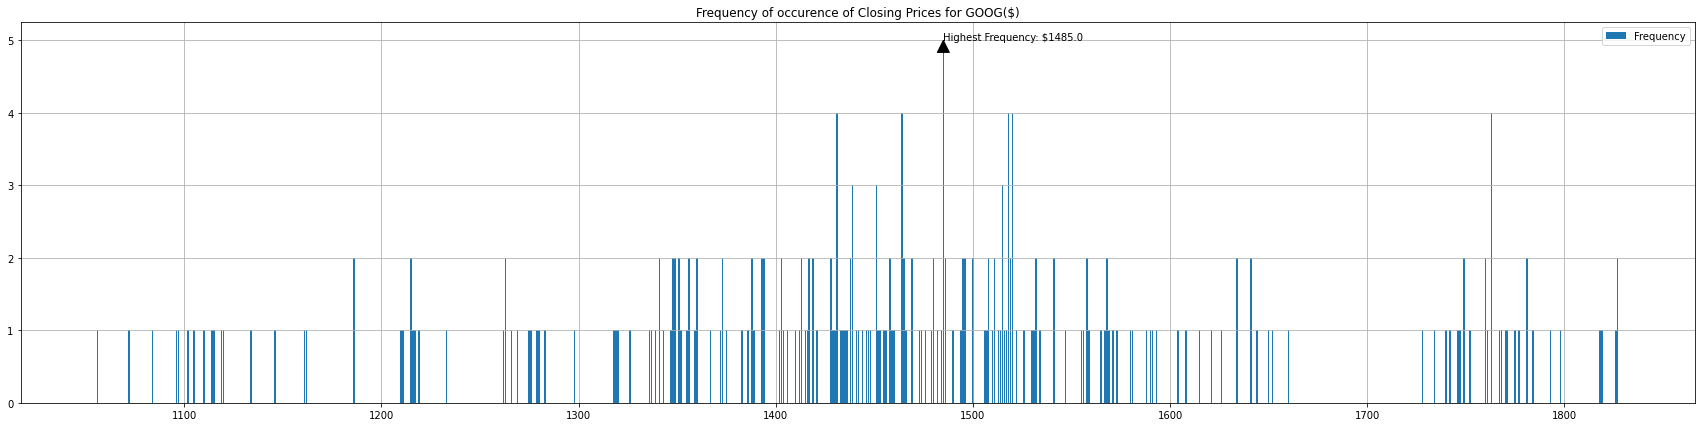

In [79]:
# Take adjClose and use np.floor() to floor the values of all prices in the 
# series. 
goog_price_counts = goog_price_volume['adjClose'].apply(lambda x: np.floor(x))\
.value_counts()

# finding highest frequency of occurence
max_Freq = np.max(goog_price_counts)
max_Freq_idx = goog_price_counts.idxmax()

#plotting bar chart of frequency of stock prices of GOOG
plt.figure(figsize=(30,7))
plt.bar(goog_price_counts.index, goog_price_counts, label='Frequency')
plt.title('Frequency of occurence of Closing Prices for GOOG($)')
plt.grid()
plt.legend();

# marking highest frequency on the chart
plt.annotate(f'Highest Frequency: ${max_Freq_idx}', 
             xy=(max_Freq_idx, max_Freq), 
             xytext=(max_Freq_idx, max_Freq), 
             arrowprops=dict(facecolor='black'));

## **Analysing Stock Prices for the time period of Dec 2019 - Dec 2020**

Let us have a look at the stock market behaviour for these companies that presumably performed well:
 - Wayfair
 - Zoom

And, let us have a look the stock market behaviour for the companies that presumably didn't perform well in the last year (due to COVID-19):
  - United Airlines
  - Live Nation Entertainment

Once people started staying indoors to prevent falling sick, the live entertainment industry and travel industry suffered as they could not keep their businesses open to entertain the crowd.

At the same time, as people started transitioning to a virtual way of life, we can hypothesize that the e-commerce businesses like Wayfair did really well. One exceptional case that stands out is Zoom, which was relatively unknown before the start of the pandemic. We can see how Zoom's stocks have skyrocketed since March, the start of the pandemic.  


In [80]:
# Get one year's adjClose prices for W, UAL, LYV, and ZM
ticker_history = client.get_dataframe(['W', 'UAL', 'LYV', 'ZM'],
                                      metric_name='adjClose',
                                      startDate='2019-12-17',
                                      endDate='2020-12-17')
ticker_history

,W,UAL,LYV,ZM
2019-12-17 00:00:00+00:00,83.64,89.36,62.91,66.17
2019-12-18 00:00:00+00:00,85.98,88.84,63.95,67.60
2019-12-19 00:00:00+00:00,85.81,89.22,69.83,68.18
2019-12-20 00:00:00+00:00,84.01,89.28,71.55,66.93
2019-12-23 00:00:00+00:00,89.06,89.44,70.44,66.15
...,...,...,...,...
2020-12-11 00:00:00+00:00,243.60,48.36,70.93,397.01
2020-12-14 00:00:00+00:00,253.48,46.72,70.35,395.99
2020-12-15 00:00:00+00:00,272.23,47.46,73.17,399.43
2020-12-16 00:00:00+00:00,273.09,46.00,72.98,404.00


Let us draw a line plot of the 4 stocks:

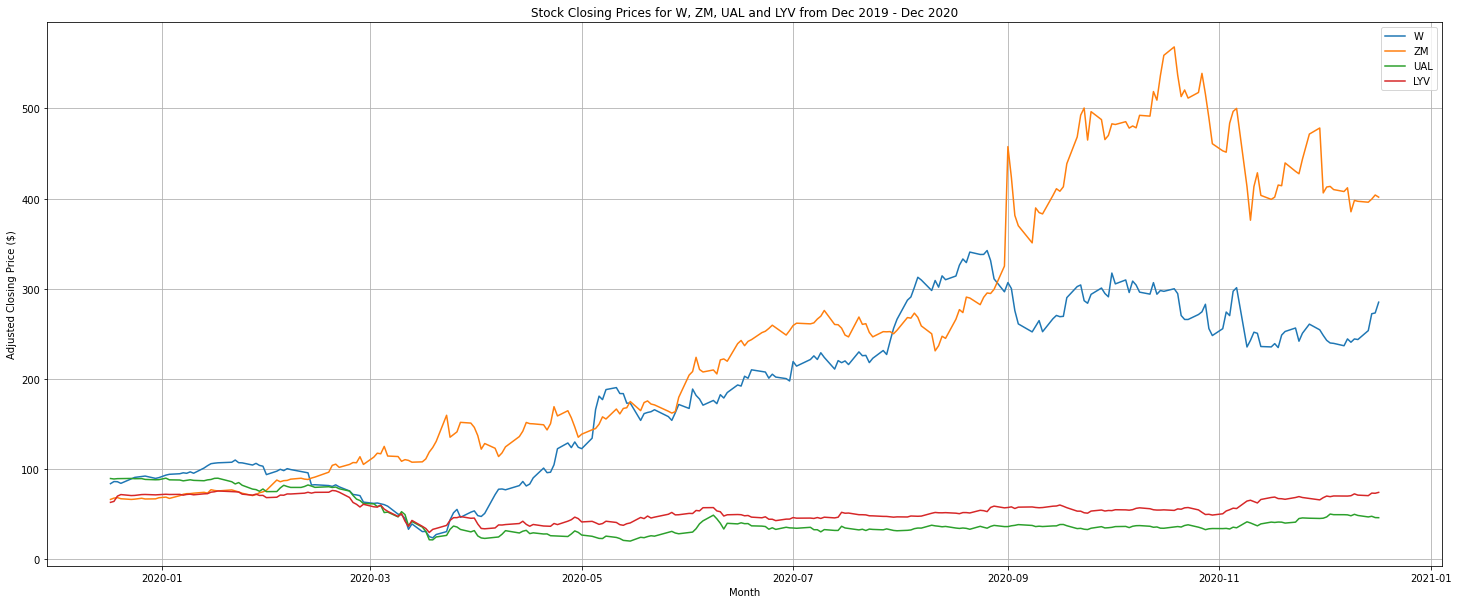

In [81]:
# Drawing line plot of the 4 stocks.
plt.figure(figsize=(25,10))
plt.grid()
plt.title("Stock Closing Prices for W, ZM, UAL and LYV from Dec 2019 - Dec 2020")
sns.lineplot(y="W", x=ticker_history.index, data=ticker_history, legend='brief', label="W");
sns.lineplot(y="ZM", x=ticker_history.index, data=ticker_history, legend='brief', label="ZM");
sns.lineplot(y="UAL", x=ticker_history.index, data=ticker_history,legend='brief', label="UAL");
ax = sns.lineplot(y="LYV", x=ticker_history.index, data=ticker_history,legend='brief', label="LYV");
ax.set(xlabel='Month', ylabel='Adjusted Closing Price ($)');

### Simple Moving Average
A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. Moving averages are an important analytical tool used to identify current price trends and the potential for a change in an established trend. The simplest use of an SMA in technical analysis is using it to quickly identify if a stock is in an uptrend or downtrend. If a shorter-term simple moving average is above a longer-term average, an uptrend is expected. On the other hand, if the long-term average is above a shorter-term average then a downtrend might be the expected outcome.

The Formula for SMA is:

\begin{aligned} &\text{SMA}=\dfrac{A_1 + A_2 + ... + A_n}{n} \\ &\textbf{where:}\\ &A_n=\text{the price of an asset at period } n\\ &n=\text{the number of total periods}\\ \end{aligned}

To calculate the mobing average, I use the `rolling()` method from `pandas.DataFrame `​. I will create a simple moving average for 10 days and 50 days at a time.


In [82]:
# Creating SMA series for 10 days for all 4 stocks
ticker_history['W_SMA_10'] = ticker_history['W'].rolling(10).mean()
ticker_history['ZM_SMA_10'] = ticker_history['ZM'].rolling(10).mean()
ticker_history['LYV_SMA_10'] = ticker_history['LYV'].rolling(10).mean()
ticker_history['UAL_SMA_10'] = ticker_history['UAL'].rolling(10).mean()

# Creating SMA series for 50 days for all ZM and UAL
ticker_history['ZM_SMA_50'] = ticker_history['ZM'].rolling(50).mean()
ticker_history['UAL_SMA_50'] = ticker_history['UAL'].rolling(50).mean()

ticker_history.tail(15)

,W,UAL,LYV,ZM,W_SMA_10,ZM_SMA_10,LYV_SMA_10,UAL_SMA_10,ZM_SMA_50,UAL_SMA_50
2020-11-27 00:00:00+00:00,260.68,45.30,67.23,471.61,245.542,424.645,67.662,41.931,474.3438,36.7516
2020-11-30 00:00:00+00:00,254.36,45.05,65.65,478.36,247.394,432.123,67.619,42.537,475.1364,36.9132
2020-12-01 00:00:00+00:00,248.22,45.32,68.11,406.31,248.675,432.839,67.598,42.969,473.8932,37.1438
2020-12-02 00:00:00+00:00,242.69,46.73,69.90,412.86,249.038,433.962,67.710,43.582,472.2984,37.3970
2020-12-03 00:00:00+00:00,239.77,49.91,69.22,413.54,249.549,433.812,67.923,44.468,470.5586,37.7336
2020-12-04 00:00:00+00:00,239.35,49.24,70.00,410.01,248.629,433.384,68.232,45.298,469.4592,38.0636
2020-12-07 00:00:00+00:00,236.70,49.20,69.93,407.85,247.045,430.209,68.594,46.228,467.6862,38.3636
2020-12-08 00:00:00+00:00,244.30,49.04,69.89,412.00,245.836,428.381,68.753,47.039,466.1730,38.6256
2020-12-09 00:00:00+00:00,240.60,48.02,70.26,385.36,245.723,424.162,68.848,47.345,464.5702,38.8958
2020-12-10 00:00:00+00:00,244.26,49.64,72.33,397.96,245.093,419.586,69.252,47.745,463.1272,39.1936


Next, I will draw the same line plot as before, but for SMA instead of the actual adjusted closing prices.

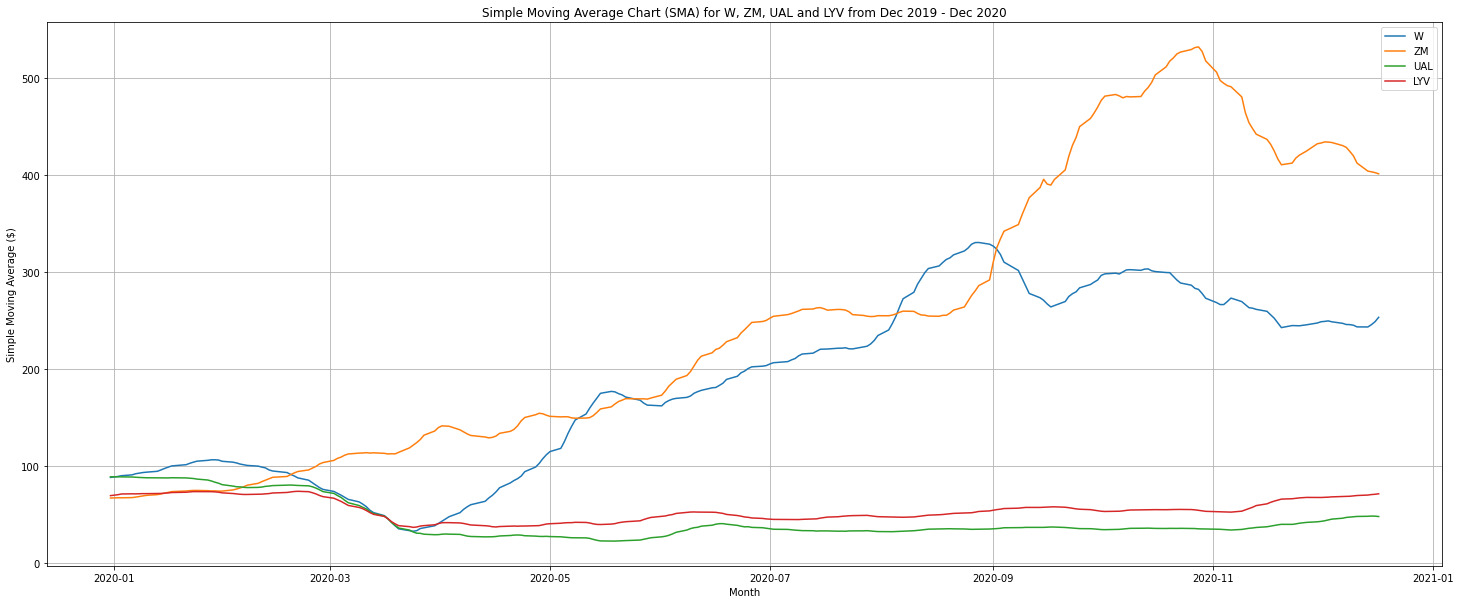

In [83]:
# Creating SMA plot for the 4 stocks
plt.figure(figsize=(25,10))
plt.title("Simple Moving Average Chart (SMA) for W, ZM, UAL and LYV from Dec 2019 - Dec 2020")
plt.grid()
sns.lineplot(y="W_SMA_10", x=ticker_history.index, data=ticker_history, legend='brief', label="W")
sns.lineplot(y="ZM_SMA_10", x=ticker_history.index, data=ticker_history, legend='brief', label="ZM")
sns.lineplot(y="UAL_SMA_10", x=ticker_history.index, data=ticker_history,legend='brief', label="UAL")
ax = sns.lineplot(y="LYV_SMA_10", x=ticker_history.index, data=ticker_history,legend='brief', label="LYV")
ax.set(xlabel='Month', ylabel='Simple Moving Average ($)');

Now, I will zoom in on the months of February, March and April.

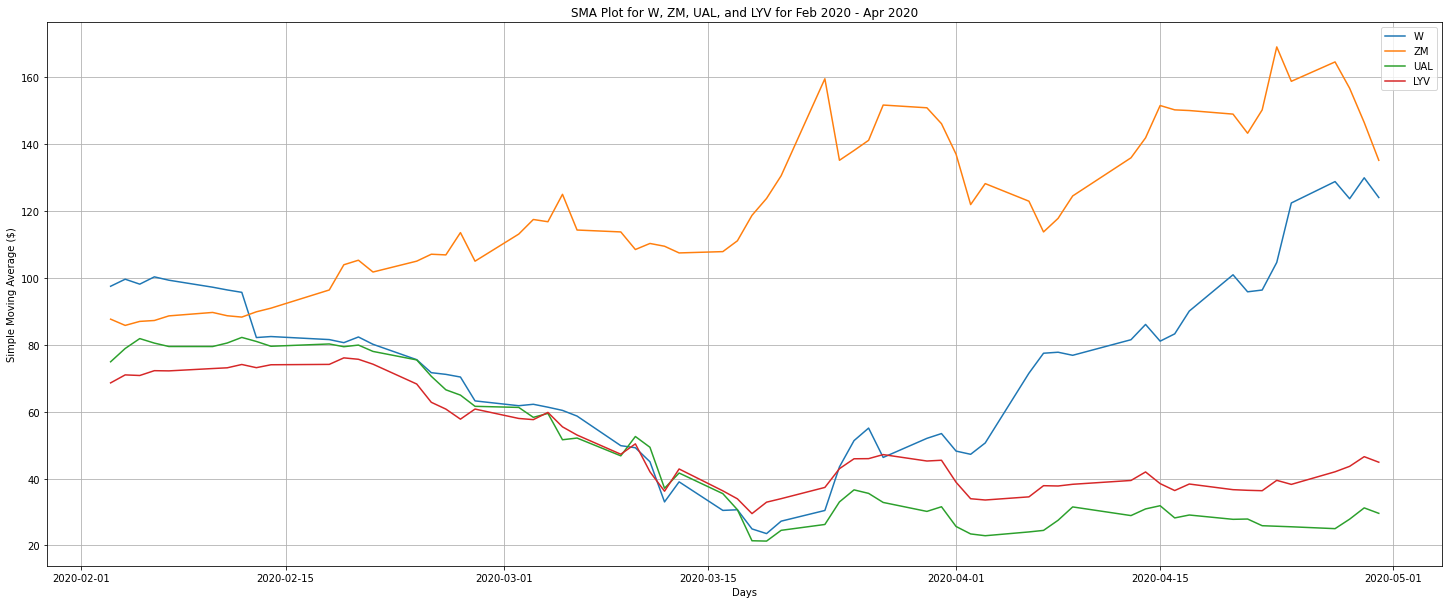

In [84]:
# Zoom in on feb-march-april 
critical_time = ticker_history
critical_time = ticker_history.filter(regex="2020-0[234].*", axis=0)

plt.figure(figsize=(25,10))
plt.grid()
plt.title("SMA Plot for W, ZM, UAL, and LYV for Feb 2020 - Apr 2020")
sns.lineplot(y="W", x=critical_time.index, data=critical_time, legend='brief', label="W")
sns.lineplot(y="ZM", x=critical_time.index, data=critical_time, legend='brief', label="ZM")
sns.lineplot(y="UAL", x=critical_time.index, data=critical_time,legend='brief', label="UAL")
ax = sns.lineplot(y="LYV", x=critical_time.index, data=critical_time,legend='brief', label="LYV")
ax.set(xlabel="Days", ylabel="Simple Moving Average ($)");


We can see a downward trend in the stock prices for 3 stocks - Wayfair, Live Nation Entertainment and United Airlines starting from the second week of February. At the same time, the stock prices of Zoom starts skyrocketing.

## United Airlines
In the beginning of March, United Airlines started reducing and cancelling flights to many places around the world. Naturally, this resulted in plummeting stocks.
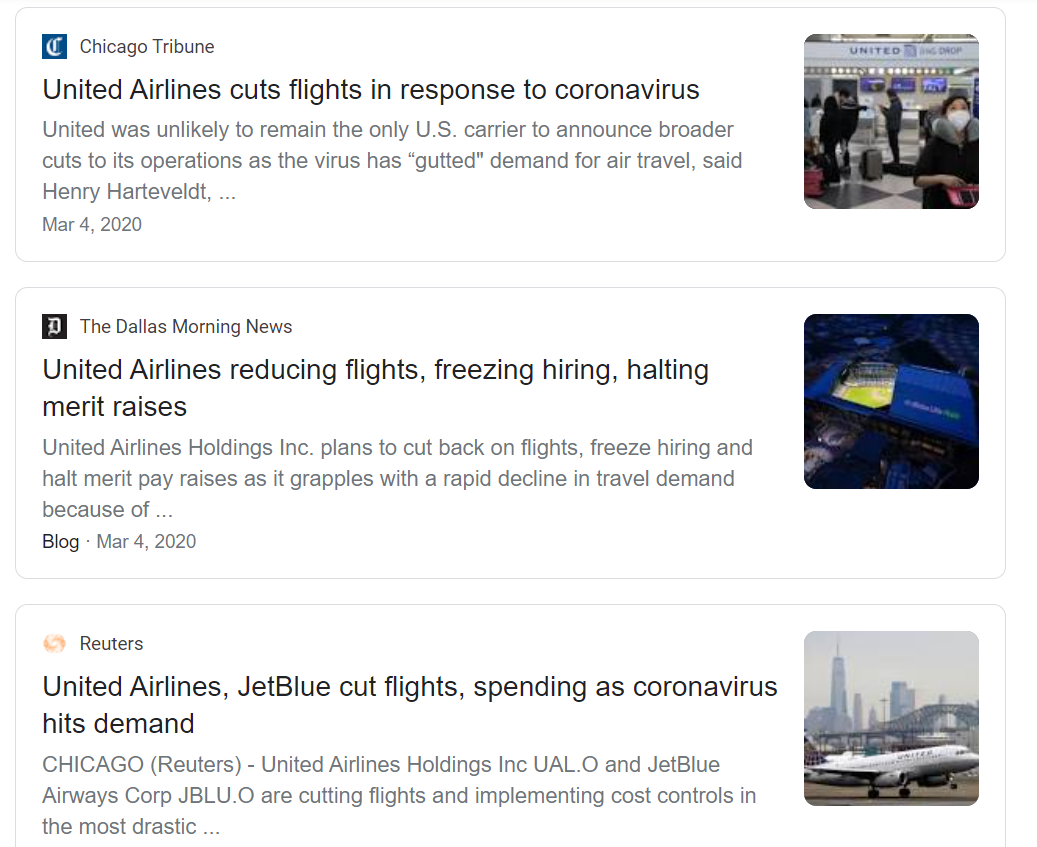 


## Zoom

With almost all tech companies and other companies mandating its employees to work from home, Zoom became the default medium of communication for everyone. How and why Zoom became the most popular video messaging platform, is another analysis entirely. Therefore, as more and more people adopted Zoom, its market grew rapidly and stocks rose high.

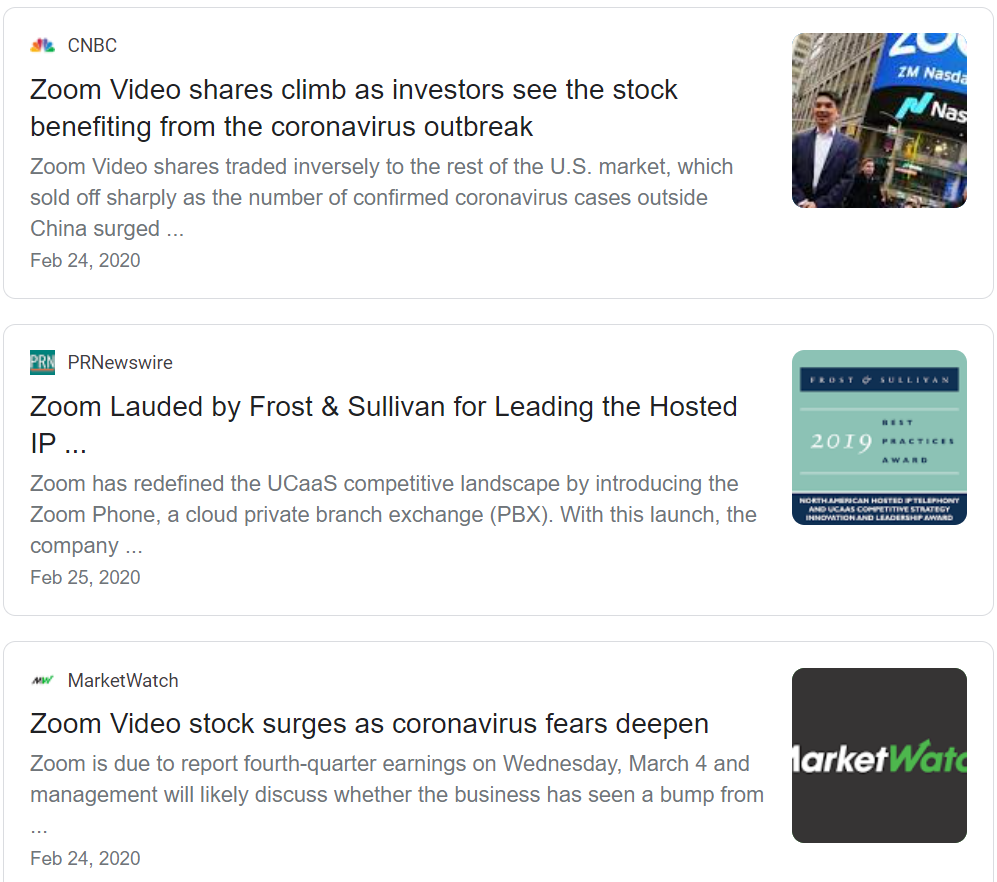

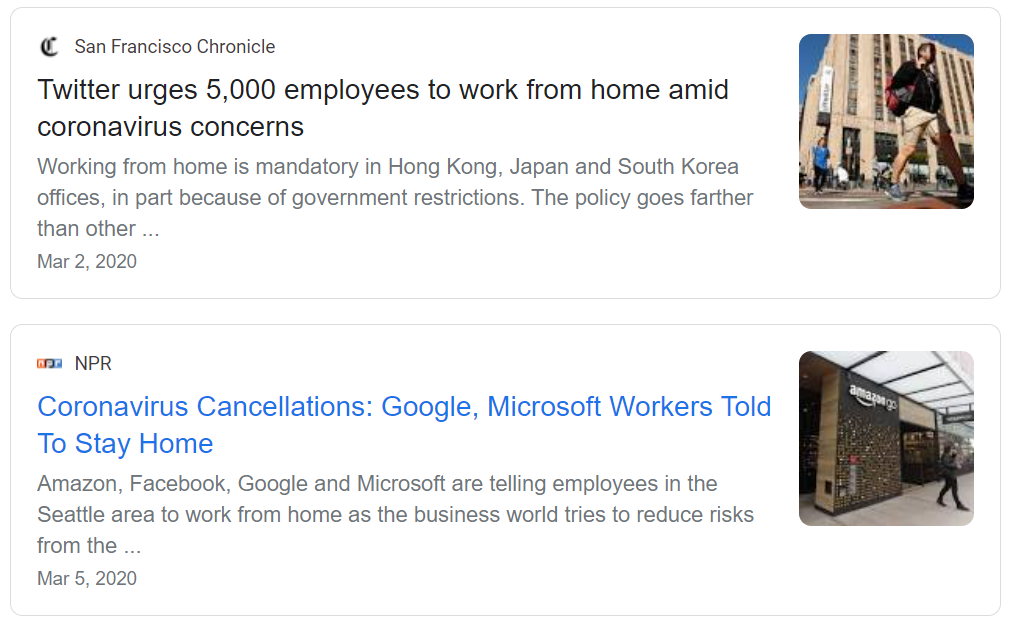

## Wayfair and Live Nation Entertainment 

It is interesting to see how Wayfair's stocks dipped during the period of mid-Feb to mid-March, presumably because people also avoided buying anything from outside other than the necessary groceries. But once the rabid fears subsided, e-commerce established itself as one of the primary methods of shopping. Hence, Wayfair's shares shot up. 

With many concerts and live shows being cancelled in 2020, LYV's shares also dipped.

In the interest of time, I will not go further into this analysis.

## Stocks Worth Buying

We can use the Simple Moving Average method as described above to see if UAL or ZM stocks are worth buying.





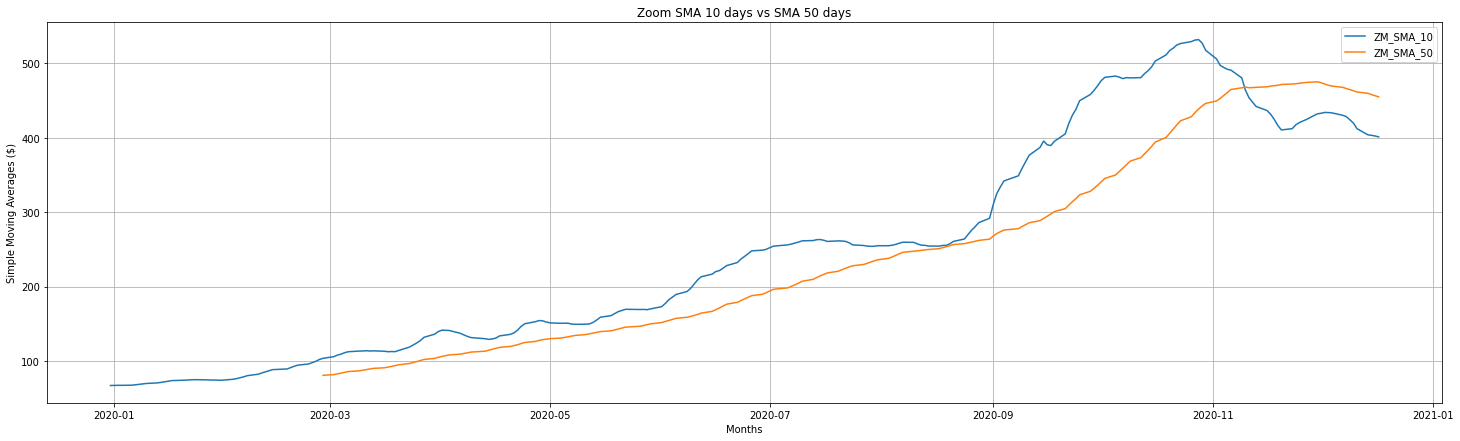

In [85]:
# Get dataframe of prices of ZM
zm_prices = ticker_history[['ZM', 'ZM_SMA_10', 'ZM_SMA_50']]

# Plot SMA 10 days vs SMA 50 days
plt.figure(figsize=(25,7))
plt.grid()
plt.title("Zoom SMA 10 days vs SMA 50 days")
sns.lineplot(y="ZM_SMA_10", x=zm_prices.index, data=zm_prices, legend='brief', label="ZM_SMA_10")
ax = sns.lineplot(y="ZM_SMA_50", x=zm_prices.index, data=zm_prices, legend='brief', label="ZM_SMA_50")
ax.set(xlabel="Months", ylabel="Simple Moving Averages ($)");


The shorter term SMA (10 days) is above the longer term SMA (50 days) for most part of the year except in beginning of November when it goes down. This means that a downtrend is expected for now. So, ZM stocks could be bought with caution in the future as a downtrend is expected. This is not what I expected as well, as I expected the uptrend to continue. Reasons for the downtrend? Have to dig deeper.

But or not to buy: **Don't buy**

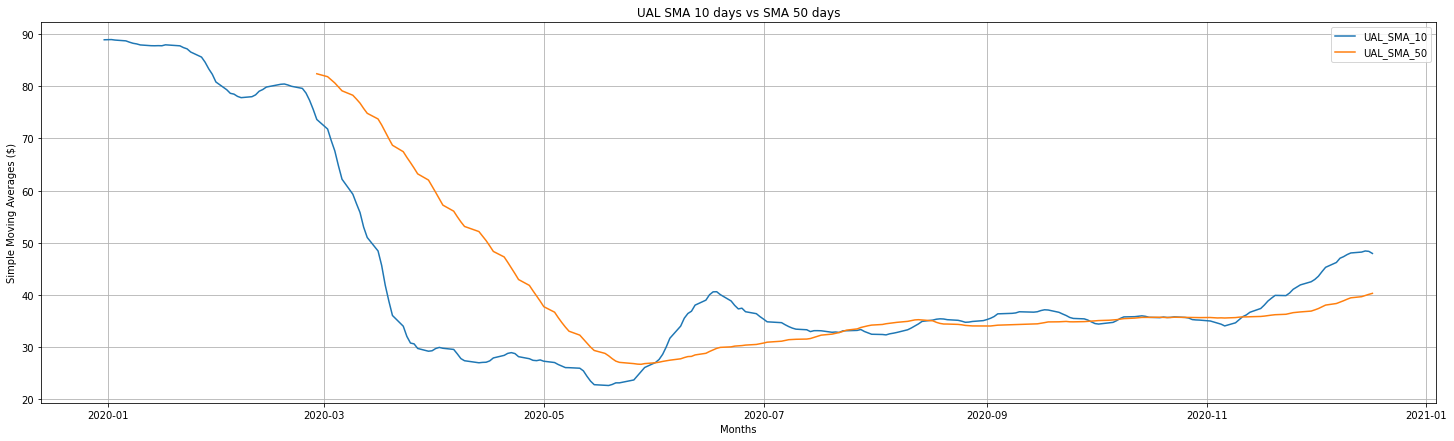

In [86]:
# Get dataframe of prices of UAL
ual_prices = ticker_history[['UAL', 'UAL_SMA_10', 'UAL_SMA_50']]

plt.figure(figsize=(25,7))
plt.grid()
plt.title("UAL SMA 10 days vs SMA 50 days")
sns.lineplot(y="UAL_SMA_10", x=ual_prices.index, data=ual_prices, 
             legend='brief', label="UAL_SMA_10")
ax = sns.lineplot(y="UAL_SMA_50", x=ual_prices.index, data=ual_prices, 
                  legend='brief', label="UAL_SMA_50")
ax.set(xlabel="Months", ylabel="Simple Moving Averages ($)");

The shorter term SMA (10 days) is below the longer term SMA (50 days) during the months of March-May, which is expected since the stocks of UAL plummeted. During the months of July-November, it stayed flat, whereas from the beginning of December the shorter term SMA is above the longer term SMA. This could be because of a variety of reasons:
 - Holiday season - so many people are travelling (especially students like me. )
 - With the Coronavirus vaccine expected soon the fears have stabilized, and normalcy is slowly returning.
 - Flights have started increasing their operations with safety measures.

 
 Buy or not to buy: **Buy, but sell soon before it plummets again.**

## Other Information and Modeling Techniques:

### Regression, Neural Networks 
Since the data that we get from most stock public APIs is only the prices, it is not suitable for any modeling as we do not have any features on which the data could be trained on. Hence, we will have to use feature generation.

Some of the features that could be created are: 
 - Year
 - Month
 - Day
 - Day of the week
 - quarter
 - ...

We could train a regression model based on the above features and see how the prediction turns out to be.

### Time Series Analysis

Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as autocorrelation, trend or seasonal variation) that should be accounted for.

Simple Moving Average is one of the simplest forms of time series analysis that can be done, and there are many more approaches such as Triple Exponential Smoothing, Frequency Based Methods, Autoregressive models, moving average models, and the Box-Jenkins approach. (https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc444.htm)



---


### Thank You
### Made by Pranav M


---



